In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_examples(x, y, n=10):
    # Generamos un conjunto aleatorio de índices
    indices = np.random.randint(0, len(x), size=n)
    # Creamos una figura con n subplots
    fig, axs = plt.subplots(1, n, figsize=(15, 15))
    # Iteramos sobre los subplots
    for i, ax in enumerate(axs):
        # Obtenemos el índice actual
        index = indices[i]
        # Mostramos la imagen y la etiqueta correspondiente
        ax.imshow(x[index], cmap='gray')
        ax.set_title(str(y[index]))
        ax.axis('off')
    # Mostramos la figura
    plt.show()

In [6]:
# Cargamos los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_train = np.subtract(255, x_train)
x_test = np.expand_dims(x_test, axis=-1)
x_test = np.subtract(255, x_test)

# Definimos el generador de datos
train_datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.4, 
    zoom_range=[1.7, 1.1],  
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.4, 
    zoom_range=[1.7, 1.1],  
    rescale=1./255
)

# Ajustamos el generador a los datos de entrenamiento
train_datagen.fit(x_train)
test_datagen.fit(x_test)

# Creamos el conjunto de datos aumentado
batch_size = 128
train_dataset = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_dataset = test_datagen.flow(x_test, y_test, batch_size=batch_size)

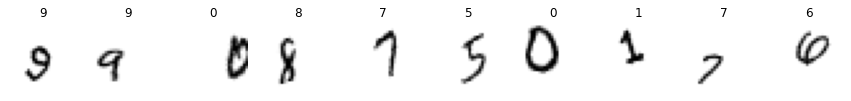

In [7]:
x_batch, y_batch = train_dataset.next()

# Mostramos algunos ejemplos
plot_examples(x_batch, y_batch)

In [8]:
# Se genera un modelo básoco convolucional para tener como base
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(32, 3, padding='same', activation='relu')) 
model.add(Conv2D(32, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# resume = model.fit(mnist_train_Ds.batch(256), validation_data=mnist_test_Ds.batch(256), epochs=100)
# model.save('my_model.h5') # Salvar la arquitectura para poder usarla fuera de esta implementación

In [10]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
469/469 [==============================] - 301s 630ms/step - loss: 2.2877 - accuracy: 0.1567 - val_loss: 2.1898 - val_accuracy: 0.2352
Epoch 2/10
469/469 [==============================] - 231s 493ms/step - loss: 1.9024 - accuracy: 0.2948 - val_loss: 1.7009 - val_accuracy: 0.3751
Epoch 3/10
469/469 [==============================] - 252s 538ms/step - loss: 1.6327 - accuracy: 0.3889 - val_loss: 1.4710 - val_accuracy: 0.4799
Epoch 4/10
469/469 [==============================] - 234s 498ms/step - loss: 1.4510 - accuracy: 0.4647 - val_loss: 1.2925 - val_accuracy: 0.5457
Epoch 5/10
469/469 [==============================] - 223s 475ms/step - loss: 1.3051 - accuracy: 0.5316 - val_loss: 1.1501 - val_accuracy: 0.6124
Epoch 6/10
469/469 [==============================] - 223s 476ms/step - loss: 1.1782 - accuracy: 0.5849 - val_loss: 1.0512 - val_accuracy: 0.6435
Epoch 7/10
469/469 [==============================] - 212s 451ms/step - loss: 1.0852 - accuracy: 0.6239 - val_loss: 0.9570 -

In [ ]:
model.save('my_model.h5') # Salvar la arquitectura para poder usarla fuera de esta implementación